# Les fonctions de perte (loss function) ☕️☕️☕️

**<span style='color:blue'> Objectifs de la séquence</span>** 
* Comprendre&nbsp;:
    * pourquoi on ne minimise pas en général le nombre d'erreurs,
    * les caractéristiques des fonctions (*loss*) qu'on minimise en pratique.
* Être capable de&nbsp;:
    * proposer une *loss*,
    * et la minimiser.
    


 ----

Situons-nous dans le cadre d'un problème de classification supervisé et notons $\mathcal{X}\subseteq\mathbb{R}^d$ et $\mathcal{Y}=\{0, 1\}$ ou $\mathcal{Y}=\{-1,+1\}$ selon le contexte et afin de simplifier les notations. Notons également $X,Y\in\mathcal{X}\times\mathcal{Y}$ deux variables aléatoires telles que $\mu$ est la mesure de $X$ et $\eta(x)=\mathbb{P}(Y=1|X=x)$. La connaissance de $\mu$ et de $\eta$ nous donne toutes les informations propres au processus générateur de notre problème. Nous pouvons d'ailleurs construire la mesure jointe. Soit $A\subseteq \mathcal{X}\times\mathcal{Y}$, nous avons:

$$\mathbb{P}(X, Y \in A)=\int_{A\cap \mathcal{X}\times \{1\}}\eta(x)d\mu+\int_{A\cap \mathcal{X}\times \{0\}}(1-\eta(x))d\mu.$$

Notre objectif est de trouver une application $h:\mathcal{X}\mapsto\mathcal{Y}$ tel qu'un risque est minimisé. *A priori* ce que nous souhaitons faire est de minimiser le nombre d'erreurs. Pour cela, nous définissons le risque dit $0/1$:

$$L(h)=\mathbb{P}(h(X)\neq Y)=\mathbb{E}\big[1\{X\neq Y\}\big].$$

Nous ne connaissons malheureusement ni $\mu$ ni $\eta$ et pour cela, nous devons estimer le risque $L$ sur un jeu de données:

$$S_n=\{(X_i, Y_i)\}_{i\leq n}\sim \mathbb{P}^n,$$

qu'on supposera représentatif du problème dans le sens où les couples $(X, Y)$ sont iid. À partir de là, nous pouvons estimer notre risque empirique:

$$L_n(h)=\frac{1}{n}\sum_i 1\{h(X_i)\neq Y_i\}.$$

Il s'agit tout simplement de la moyenne des erreurs.

Notre objectif, en tant que *machine learner* est de minimiser cette erreur. Bien sûr (#nofreelunchtheorem), nous ne pouvons pas considérer toutes les fonctions de $\mathcal{X}$ dans $\mathcal{Y}$. Soit $\mathcal{H}$ la classe de fonctions que nous souhaitons considérer. Le problème à résoudre est:

$$h_n=\text{argmin}_{h\in\mathcal{H}}L_n(h).$$

C'est ce qu'on appelle le minimiseur du risque empirique. Remarquez que ce n'est pas exactement ce qu'on minimise en pratique. Nous allons voir pourquoi.

## I. Une première minimisation du risque empirique

### Construction du jeu de données

In [1]:
import numpy as np

In [2]:
def h_star(x):
    y = np.zeros(x.shape[0])
    y[x[:,1]>x[:,0]] = 1
    y[x[:,1]<=x[:,0]] = -1
    return y

def construct_dataset(n):
    X = np.random.uniform(-1, 1, (n, 2))
    return X, h_star(X)

In [3]:
X, y = construct_dataset(50)

### Affichage du dataset 

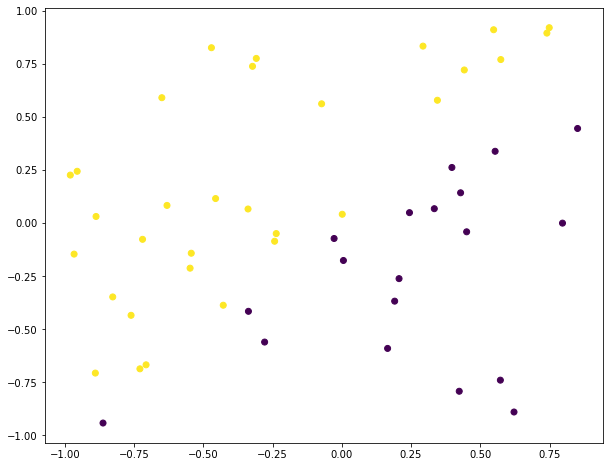

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Notre classe de fonctions linéaires $\mathcal{H}$

Considérons le cas très simple des modèles linéaires. Ici, notre ensemble de fonctions $\mathcal{H}$ est l'ensemble de cardinal infini dont les frontières de décision sont les droites dans le plan&nbsp;:

$$\mathcal{H}=\{x\mapsto\text{sign}(\langle \omega, x\rangle+b):\ \omega\in\mathbb{R}^2,\ b\in\mathbb{R}\},$$

où&nbsp;:

$$\text{sign}(x)=\begin{cases}+1\text{ si }x\geq 0\\-1\text{ sinon.}\end{cases}$$

où, nous avons supposé que $\mathcal{Y}=\{-1, 1\}$ afin de simplifier les notations. Notre problème de minimisation devient donc&nbsp;:

$$(\omega, b)=\text{argmin}_{\omega, b\in \mathbb{R}^2\times\mathbb{R}}\frac{1}{n}\sum_i \mathbf{1}\{\text{sign}(\langle \omega, x_i\rangle+b)\neq y_i\}.$$

Notez que nous avons la formulation équivalente suivante&nbsp;:

$$(\omega, b)=\text{argmin}_{\omega, b\in \mathbb{R}^2\times\mathbb{R}}\frac{1}{n}\sum_i \mathbf{1}\{ y_i(\langle \omega, x_i\rangle+b)< 0\}.$$

Comment faire cela ? La fonction à optimiser est constante par morceau et les optimiseurs à base d'information du premier ordre (i.e. dérivée, gradient) ne peuvent pas nous aider. Une stratégie est de constater que dans le plan, une droite n'a besoin que de deux points pour se positionner. À partir de deux points $x_1$ et $x_2$, il est possible d'obtenir une valeur de $\omega$ et de $b$ en résolvant le système d'équations suivant&nbsp;:

$$\begin{cases}\langle\omega, x_1\rangle + b=0\\\langle\omega, x_2\rangle +b=0.\end{cases}$$

Il y a évidemment une infinité de solutions (deux équations et trois inconnues). On peut résoudre ce problème en contraignant la norme de $\omega$ à valoir $1$.

Il suffit maintenant de tester toutes les valeurs possibles de $\omega$ et de $b$ s'appuyant sur des points de notre jeu de données et de prendre celle qui fait le moins d'erreurs&nbsp;!

**<span style='color:blue'> Exercice</span>** 
**Implémentez notre modèle de classification $h$ (i.e. la fonction qui fait une prédiction quant à la classe).**



 ----

In [ ]:
def h(x, omega, b):
    ####### Complete this part ######## or die ####################
    ...
    ...
    ...
    ###############################################################
    return predictions


**<span style='color:blue'> Exercice</span>** 
**Implémentez une methode qui prend en paramètre deux points et retourne un vecteur $\omega$ qui décrit l'orientation de l'hyperplan et le biais $b$.**



 ----

In [ ]:
def parameterize(x_1, x_2):
    ####### Complete this part ######## or die ####################
    ...
    ...
    ...
    ...
    ###############################################################
    return omega, b


**<span style='color:blue'> Exercice</span>** 
**Implémentez une méthode qui calcule le risque empirique.**



 ----

In [ ]:
def empirical_risk(X, y, omega, b):
    ####### Complete this part ######## or die ####################
    risk = ...
    ###############################################################
    return risk


**<span style='color:blue'> Exercice</span>** 
**Implémentez une méthode qui calcule le minimiseur du risque empirique.**



 ----

In [ ]:
def fit_empirical_risk(X, y):
    ####### Complete this part ######## or die ####################
    ...
    ...
    ...
    ...
    ...
    ...
    ...
    ###############################################################
    return best_omega, best_b, best_risk


Testons le code précédent.

In [ ]:
omega, b, _ = fit_empirical_risk(X, y)
print('Obtained empirical risk:', _)


Affichons maintenant le séparateur ainsi calculé.

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)

x_ = np.linspace(-1, 1, 101)
y_ = (-b-omega[0]*x_)/omega[1]
plt.plot(x_, y_)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('Our data and our model')
plt.show()


Malheureusement, tester toutes les combinaisons a un coût qui nous empêche de considérer des jeux de données trop grands et en trop grande dimension. Il y a en effet dans $\mathbb{R}^d$ $n!/(d!(n-d)!)$ combinaisons possibles à tester. Dans le plan, cela nous donne :

$$\frac{n!}{2(n-2)!}=0.5n(n-1)\approx 0.5 n^2$$

In [ ]:
import time

fit_duration = []
dataset_sizes = list(range(10, 291, 20))
for n in dataset_sizes:
    X, y = construct_dataset(n)
    start = time.time()
    omega, b, _ = fit_empirical_risk(X, y)
    fit_duration.append(time.time()-start)


In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(dataset_sizes, fit_duration, label='Fit time')

scale = fit_duration[-1]/(dataset_sizes[-1]**2)

theoretical_fit_duration = np.power(np.array(dataset_sizes), 2)*scale

plt.plot(dataset_sizes, theoretical_fit_duration, label='Estimated fit time')

plt.title('Fit duration')
plt.ylabel('Time (s)')
plt.xlabel('Dataset size')
plt.legend()
plt.show()


In [ ]:
print('Avec un jeu de données de taille 150000 dans le plan (petite dim),'\
      'le temps du fit estimé est d\'environ', int(np.round(scale * 150000**2/60/24)), 'jours')


On peut résoudre ce problème avec notamment deux visions différentes&nbsp;:
    
1. On estime la loi conditionnelle $\hat{\eta}\approx\eta$ et on utilise une *plug-in* rule (la même règle que pour le classifieur de Bayes)&nbsp;:

$$\hat{g}(x)=\begin{cases}1\text{ si }\hat{\eta}(x)\geq 0.5\\0\text{ sinon.}\end{cases}$$

2. On optimise un autre "risque" qu'on appelle un $\phi$-risk et qui nous garantit que le résultat ne sera pas trop mauvais par rapport au vrai risque.

La séquence de cours sur la régression logistique montre un résultat de convergence pour le premier cas. Cette séquence aborde le deuxième point.

## II. Construction du $\phi$-risk

À la place de chercher à optimiser notre erreur 0/1, l'idée va être de trouver une fonction avec des propriétés mathématiques intéressantes et pouvant nous offrir certaines garanties du point de vue de la classification. Considérons ici les labels $\mathcal{Y}=\{-1, 1\}$ et supposons que notre classe de fonctions ait la forme suivante&nbsp;:

$$\mathcal{H}=\{h:x\mapsto \text{sign}(g(x)),\ g:\mathcal{X}\rightarrow\mathbb{R}\}$$

Il s'agit de la composition entre une fonction de score $g$ et de la fonction&nbsp;:

$$\text{sign}(x)=\begin{cases}+1\text{ si }x\geq 0\\-1\text{ sinon.}\end{cases}$$

Un classifieur $h\in\mathcal{H}$ est donc une fonction de $\mathcal{X}\rightarrow \{-1,+1\}$. Un $\phi$-risk est un risque "facile" à minimiser et qui garantit d'être un "bon choix" du point de vue de l'erreur 0/1.

**<span style='color:blue'> Définition ($\phi$-risk)</span>** 
Un $\phi$-risk est défini comme&nbsp;:

$$L^\phi(g)=\mathbb{E}\big[\phi(Yg(X))\big],$$

avec les propriétés suivantes&nbsp;:

1. **Majoration du risque 0/1** : $\phi(z)\geq \mathbf{1}\{z<0\}$,
2. **Convexité** : La fonction $\phi:\mathbb{R}\rightarrow\mathbb{R}^+$ est convexe,
3. **Calibrée pour la classification** : La fonction $\phi$ est dérivable en $0$ et $\phi^\prime(0)<0$.



 ----
Nous allons bien entendu détailler l'intérêt de ces propriétés. Le risque empirique associé devient alors :

$$L_n^\phi(g)=\frac{1}{n}\sum_i \phi(Y_ig(X_i)).$$

Comme nous l'avons vu dans la définition, avec la fonction $\phi$ suivante :

$$\phi(z)=\mathbf{1}\{z< 0\},$$

on retombe sur notre erreur $0/1$. En effet, on compte $1$ si le signe de $Yg(X)$ est négatif, à savoir, si notre score ne correspond pas au label et $0$ sinon. D'autres choix de $\phi$-risks sont les suivants (il y en a beaucoup d'autres) :

*  **Hinge loss** : $\phi(z)=\text{max}(0, 1-z)$, ici  on pénalise tous les $z$ tant qu'ils sont inférieur à $1$. Cette loss est notamment utilisée par le SVM qui cherche à obtenir une marge,
*  **Smoothed hinge loss** : $\phi(z)=\beta^{-1}\text{log}\big(1+e^{\beta(1-z)}\big)$, où $\beta>0$ est un paramètre. On retrouve la hinge loss comme limite lorsque $\beta\rightarrow\infty$,
* **Logistic loss** : $\phi(z)=\text{log}(1+e^{-z})$, c'est la loss utilisée lorsqu'on fait une régression logistique ou de la classification binaire en *deep learning*. En effet, on a :

$$\text{log}(1+e^{-yg(x)})=-\text{log}\Big(\frac{1}{1+e^{-yg(x)}}\Big)=-\big(\mathbf{1}\{y=1\}\text{log}(\sigma(g(x)))+\mathbf{1}\{y=-1\}\text{log}(1-\sigma(g(x)))\big),$$

où $\sigma(z)=(1+e^{-z})^{-1}$ est la fonction sigmoïd. C'est la composition de notre fonction de score $g$ avec une sigmoïd avec une log-entropie négative (i.e. on veut maximiser la vraisemblance du modèle $\sigma(g(x))$. Si $g$ est un modèle linéaire, alors on retombe sur la régression logistique.

Visualisons ces quelques $\phi$-risk.

In [14]:
def zero_one_loss(x):
    return (x<0).astype(int)

def hinge_loss(x):
    v = 1-x
    return v * (v>0).astype(int) + np.zeros(x.shape) * (v<=0).astype(int)

def logistic_loss(x):
    return np.log(1+np.exp(-x))

def soft_hinge_loos(x, beta=3):
    return logistic_loss(beta*(x-1))/beta

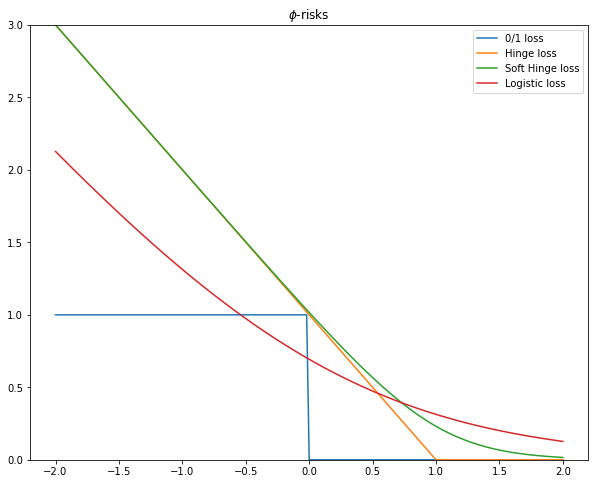

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 201)
plt.figure(figsize=(10, 8))

plt.plot(x, zero_one_loss(x), label='0/1 loss')
plt.plot(x, hinge_loss(x), label='Hinge loss')
plt.plot(x, soft_hinge_loos(x), label='Soft Hinge loss')
plt.plot(x, logistic_loss(x), label='Logistic loss')
plt.ylim(0, 3)
plt.legend()
plt.title(r'$\phi$-risks')
plt.show()

## III. Les propriétés d'un $\phi$-risk

### A. Majoration du risque 0/1

La définition d'un $\phi$-risk indiquait que ce dernier devait majorer l'erreur 0/1. En réalité nous pouvons alléger cette contrainte et dire qu'un $\phi$-risk doit majorer le risque 0/1 a un facteur proportionnel près. Ainsi le risque logistique ne majore pas l'erreur 0/1 car $\log(1+e^0)<1$. Cependant, nous avons bien&nbsp;:

$$\frac{1}{\log 2}\phi(z)\geq \mathbf{1}\{z<0\}.$$

**<span style='color:blue'> Exercice</span>** 
**Intuitivement, supposons que l'on minimise l'un des $\phi$-risk sur notre problème de *machine learning* et qu'on obtienne $0$ erreur à la fin. Que pouvons nous dire quant au risque $0/1$ ?**



 ----

De manière plus générale, notre objectif reste de minimiser la quantité d'erreurs de classifications. Notons $g^\star$ le classifieur de Bayes et $h_n$ le minimiseur du $\phi$-risk empirique sur un jeu de données de taille $n$. Nous pouvons majorer le risque 0/1 de la manière suivante&nbsp;:

$$L^{\text{0/1}}(h_n)\leq \underbrace{L^\text{0/1}(g^\star)}_{\text{Bayes risk}}+(\underbrace{\inf_{h\in\mathcal{H}}L^\text{0/1}(h)-L^\text{0/1}(g^\star)}_{\text{Approximation error}})+(\underbrace{L^\phi(h_n)-\inf_{h\in\mathcal{H}}L^\phi(h)}_{\text{Estimation error}})+(\underbrace{\inf_{h\in\mathcal{H}}L^\phi(h)-\inf_{h\in\mathcal{H}}L^\text{0/1}(h)}_{\text{Optimization error}})$$

On supposera que $L^\phi$ aura été recalibrée de manière à bien majorer le risque $L^{0/1}$.

**<span style='color:blue'> Exercice</span>** 
Décrivez chacune des erreurs.



 ----
**<span style='color:blue'> Exercice</span>** 
Démontrez l'inégalité.



 ----


### B. Convexité

La convexité garantit un certain nombre de propriétés dont la plus intéressante, peut-être, est que si nous trouvons un minimiseur local de notre loss, alors celui-ci est également un minimiseur global. C'est donc une propriété idéale pour la minimisation.

### C. Calibré pour la classification

La dernière propriété que nous avons évoquée est d'être calibré pour la classification. Nous avons indiqué que cela était équivalent à avoir $\phi$ dérivable en $0$ et $\phi^\prime(0)<0$.

Rappellons la notation $\eta(x)=\mathbb{P}(Y=1|X=x)$ indique la **vraie** probabilité conditionnelle d'obtenir le label $1$ sachant qu'on a observé la donnée $x$. Nous avons donc la probabilité du label $-1$ avec $1-\eta(x)$. La fonction $\eta$ n'est bien sûr pas connue. Cependant, nous avons&nbsp;:

$$\mathbb{E}\Big[\phi(Yg(x))|X=x\Big]=\eta(x)\phi(g(x))+(1-\eta(x))\phi(-g(x))=:C_\eta(g(x)).$$

C'est tout simplement l'espérance de notre $\phi$-risk lorsqu'on a observé la donnée $x$.

Rappelons-nous que la fonction $g$ retourne un score positif si on prédit le label $y=1$ et un score négatif si on prédit le label $y=-1$. Ainsi, si $\eta(x)>0.5$, alors, on veut prédire le label $1$ et on veut que $g(x)>0$. À l'inverse, si $\eta(x)<0.5$, alors on veut prédire le label $-1$ et on veut $g(x)<0$. Plus formellement, nous pouvons définir cela comme suit.

**<span style='color:blue'> Définition (*loss* calibrée pour la classification)</span>** 
Un $\phi$-risk est calibré pour la classification si et seulement si&nbsp;:

$$\eta>0.5\Leftrightarrow\text{argmin}_{z}C_\eta(z)\subset\mathbb{R}^{\star+},$$

$$\eta<0.5\Leftrightarrow\text{argmin}_{z}C_\eta(z)\subset\mathbb{R}^{\star-}.$$



 ----
Les minimiseurs de notre *loss* (du point de vu du score), doivent avoir le même signe que $\eta-0.5$. Cela a bien entendu un effet sur la forme que peut prendre $\phi$ et en particulier celui que nous illustrons par la proposition suivante.

**<span style='color:blue'> Proposition</span>** 
$\phi$ est dérivable en $0$ et $\phi^\prime(0)<0$ si et seulement si $\phi$ est calibrée pour la classification.



 ----
**<span style='color:orange'> Preuve</span>** 
Notons $\phi_+$, $\phi_-$, $(C_\eta)_+$ et $(C_\eta)_-$ les dérivées à gauche et à droite. Nous avons alors, pour que les inégalités soient satisfaites, $(C_\eta)_+^\prime(0)<0\Leftrightarrow \eta>0.5$ et $(C_\eta)_-^\prime(0)>0\Leftrightarrow \eta<0.5$ puisque $C_\eta$ est convexe en tant que combinaison convexe de fonctions convexes. Pour se convaincre des équivalences précédentes, supposons $\eta>0.5$, alors le minimum de $C_\eta(z)$ doit être atteint avec $z>0$. Si $(C_\eta)_+^\prime(0)<0$, alors le minimum est "à droite" de 0 et répond au besoin. 

$(\Leftarrow)$ Supposons que les deux inégalités soient satisfaites.

Nous voulons montrer (1) que $\phi$ est dérivable en $0$ et (2) que $\phi^\prime(0)<0$.

On a (attention à la dérivée) :

$$\lim_{\eta\rightarrow 0.5^+}(C_\eta)_+^\prime(0)=\lim_{\eta\rightarrow 0.5^+}\eta\phi_+^\prime(0)-(1-\eta)\phi_-^\prime(0)=0.5\big(\phi_+^\prime(0)-\phi_-^\prime(0)\big)\leq 0.$$

La dernière inégalité est vérifiée par hypothèse sur $C_\eta$. Cela nous donne donc $\phi_-^\prime(0)\geq\phi_+^\prime(0)$. Par hypothèse, $\phi$ est convexe et on a toujours $\phi_-^\prime(0)\leq\phi_+^\prime(0)$. On a donc $\phi_+^\prime(0)=\phi_-^\prime(0)$ et $\phi$ est dérivable en $0$. C'est le premier point. 

Nous avons ensuite :

$$C_\eta^\prime(0)=\eta\phi^\prime(0)-(1-\eta)\phi^\prime(0)=(2\eta-1)\phi^\prime(0).$$

Si $\eta>0.5$, alors $2\eta-1>0$ et $C_\eta^\prime(0)<0$. On a alors $\phi^\prime(0)<0$. On obtient le même résultat si $\eta<0.5$ !

$(\Rightarrow)$ Supposons que $\phi$ est dérivable en $0$ et que $\phi^\prime(0)<0$. On obtient alors :

$$C_\eta^\prime(0)=(2\eta-1)\phi^\prime(0)$$

dont le signe est négatif si $\eta>0.5$ et positif si $\eta<0.5$. **$\boxed{}$**



 ----


### D. Construction

Maintenant que nous avons vu et décrit les propriétés d'un $\phi$-risk calibré pour la classification, nous pouvons laisser notre imagination à en créer de nouveaux.

**<span style='color:blue'> Exercice (créer une *loss*)</span>** 
Nous avons vu les propriétés qu'un $\phi$-risk devait respecter pour être "classification calibrated". Inventez une nouvelle fonction de perte (i.e. *loss*).



 ----
**<span style='color:green'> Indice</span>** 
Utilisez des fonctions simples, connues, convexes, etc..



 ----


## IV. *Logistic loss* et régression logistique

La *logistic loss* est $\phi(z)=\text{log}(1+e^{-z})$. Considérons un jeu de données $S_n$, notre objectif pratique est de minimiser le $\phi$-risk empirique :

$$L_n^\phi(g)=\frac{1}{n}\sum_i\phi(y_ig(x_i))=\frac{1}{n}\sum_i\text{log}(1+e^{-y_ig(x_i)})$$

Reprenons le cas d'un modèle linéaire. Cela nous permettra de comparer les coûts calculatoires avec le vrai risque empirique. Nous avons donc&nbsp;:

$$\mathcal{H}=\{x\mapsto \text{sign}(g(x)):\ g(x)=\langle \omega, x\rangle +b,\ \omega\in\mathbb{R}^d,\ b\in\mathbb{R}\}$$

L'optimisation du $\phi$-risk se fera bien sûr à partir de la fonction $g(x)$ et non de $\text{sign}(g(x))$.

Notre objectif est, dans un premier temps, de calculer le gradient de notre $\phi$-risk empirique. La première étape est de calculer la dérivée de la fonction $\phi(yz)$ :

$$\phi^\prime(yz)=-\frac{ye^{-yz}}{1+e^{-yz}}=-\frac{y}{1+e^{yz}}.$$

Observons notamment qu'on a&nbsp;:

$$\begin{aligned}
\phi^\prime((+1)z)&=\frac{1}{1+e^{-z}}-1=\sigma(z)-y^{0/1}\\
\phi^\prime((-1)z)&=\frac{1}{1+e^{-z}}-0=\sigma(z)-y^{0/1}
\end{aligned}$$

où $y^{0/1}$ représente le label $0$ ou $1$ plutôt que $-1$ et $+1$. Par simplicité de notation considérons les vecteur $x_i=[1, x_1, \ldots, x_d]^T$ afin d'éviter la notation avec le biais $b$.

Nous avons donc naturellement que :

$$\nabla_\omega g(x)=x$$

et donc :

$$\nabla_\omega \phi(y_ig(x_i))=x_i\left(\frac{1}{1+e^{-\langle \omega, x_i\rangle}}-y_i^{0/1}\right),$$

On retrouve le gradient que nous avons calculé lors de la précédente séquence (i.e. sur la régression logistique) où on avait : 

$$\nabla_\omega L_n(\omega)=\frac{1}{n}X^T(\sigma(X\boldsymbol{\omega})-\boldsymbol{y}^{0/1})$$

In [17]:
class CrossEntropy(object):
    def __init__(self, X, y):
        self.X = np.insert(CrossEntropy._format_ndarray(X), 0, 1, axis=1)
        self.y = (y>0).astype(int)
        self.idx = np.array([i for i in range(self.X.shape[0])])
        self._pos = 0
        
    def _format_ndarray(arr):
        arr = np.array(arr) if type(arr) is not np.ndarray else arr
        return arr.reshape((arr.shape[0], 1)) if len(arr.shape) == 1 else arr
    
    def predict(self, X):
        y_pred = (1+np.exp(-np.dot(X, self.beta)))**(-1)

        return y_pred
    
    def _sigmoid(X, beta):
        z = np.dot(X, beta)
        z_max = z.max()
        # numerical stability trick
        return np.exp(z-z_max)/(np.exp(z-z_max)+np.exp(-z_max))
    
    def val(self, beta):
        beta = CrossEntropy._format_ndarray(beta)
        p = CrossEntropy._sigmoid(self.X, beta)
        log_p = -np.concatenate([np.log(1-p), np.log(p)], axis=1)[np.arange(len(self.X)), self.y]
        return log_p.sum()/len(self.X)
    
    def _shuffle(self):
        np.random.shuffle(self.idx)
    
    def grad(self, beta, batch_size=-1):
        batch_size = self.X.shape[0] if batch_size == -1 else batch_size
        idx = self.idx[self._pos:self._pos+batch_size]

        self._pos = (self._pos+batch_size) % self.X.shape[0]
        if self._pos == 0:
            self._shuffle()
            
        X, y = self.X[idx], self.y[idx]
        y = CrossEntropy._format_ndarray(y)

        
        beta = CrossEntropy._format_ndarray(beta)
        
        grad = np.dot(X.T, CrossEntropy._sigmoid(X, beta)   - y)
        return grad/len(X)

In [18]:
class GradientDescent(object):
    init = np.random.uniform(-4, 4, size=3).reshape((3, 1))
    def __init__(self, X, y, loss=CrossEntropy):
        self.loss = loss(X, y)
        
    def optimize(self, learning_rate = 1., nb_iterations=10, beta=init, batch_size=-1):
        param_trace = [beta.T[0]]
        loss_trace = [self.loss.val(beta)]
        for i in range(nb_iterations):
            beta = beta - learning_rate * self.loss.grad(beta, batch_size=batch_size)
            param_trace.append(beta.T[0])
            loss_trace.append(self.loss.val(beta))
            
        return param_trace, loss_trace

X, y = construct_dataset(200)
gd = GradientDescent(X, y)

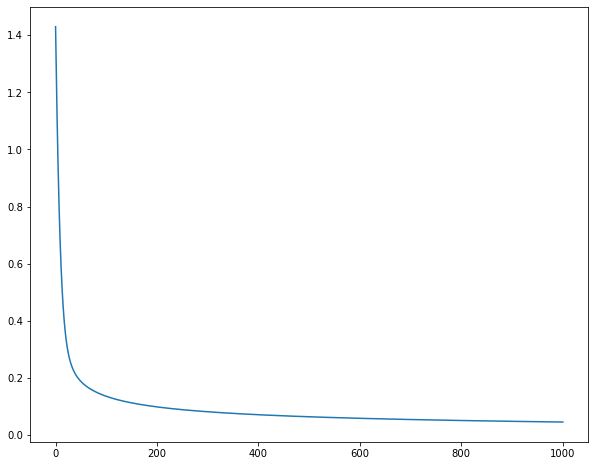

In [19]:
params, _ = gd.optimize(nb_iterations=1000)
plt.figure(figsize=(10, 8))
plt.plot(_)
plt.show()

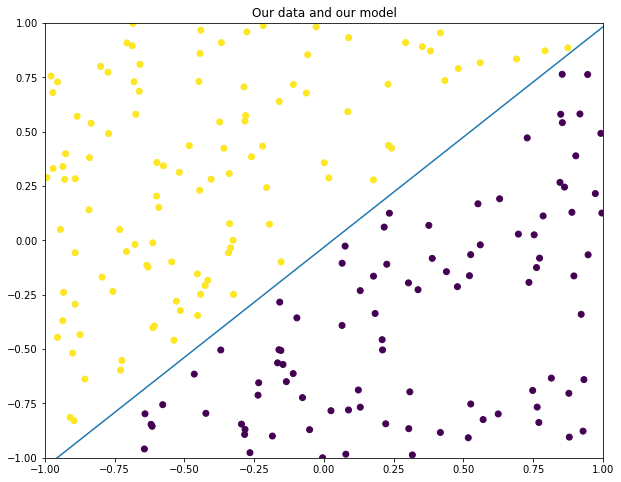

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)
omega = params[-1][1:3]
b = params[-1][0]
x_ = np.linspace(-1, 1, 101)
y_ = (-b-omega[0]*x_)/omega[1]
plt.plot(x_, y_)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('Our data and our model')
plt.show()

Étudions l'évolution du temps de calcul et comparons le au minimiseur du risque empirique.

In [ ]:
import time

fit_duration_erm = []
fit_duration_phi_risk = []
dataset_sizes = list(range(10, 291, 20))
for n in dataset_sizes:
    X, y = construct_dataset(n)
    start = time.time()
    omega, b, _ = fit_empirical_risk(X, y)
    fit_duration_erm.append(time.time()-start)
    
    gd = GradientDescent(X, y)
    start = time.time()
    params, _ = gd.optimize(nb_iterations=1000)
    fit_duration_phi_risk.append(time.time()-start)


In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(dataset_sizes, fit_duration_erm, label='ERM fit time')

scale = fit_duration_erm[-1]/(dataset_sizes[-1]**2)

theoretical_fit_duration = np.power(np.array(dataset_sizes), 2)*scale

plt.plot(dataset_sizes, theoretical_fit_duration, label='Estimated ERM fit time')

plt.plot(dataset_sizes, fit_duration_phi_risk, label='$\phi$-risk fit time')

plt.title('Fit duration')
plt.ylabel('Time (s)')
plt.xlabel('Dataset size')
plt.legend()
plt.show()


**<span style='color:blue'> Question</span>** 
**Qu'en conclure ? Dans quel cas le minimiseur du risque empirique a-t-il toujours du sens ?**



 ----

## V. Optimiser votre *loss*

**<span style='color:blue'> Exercice (Optimisez votre *loss*)</span>** 
Dans un exercice précédent vous avez créé votre propre *loss*. Utilisez votre *loss* sur le jeu de données précédent avec un modèle linéaire&nbsp;:

$$\mathcal{H}=\{x\rightarrow\text{sign}(g(x)):\ g(x)=\langle\omega, x\rangle +b,\ \omega\in\mathbb{R}^d,b\in\mathbb{R}\}.$$

où&nbsp;:

$$\text{sign}(x)=\begin{cases}+1\text{ si }x\geq 0\\-1\text{ sinon.}\end{cases}$$



 ----


In [ ]:
# pensez a ajouter une colonne de 1 si vous voulez un biais
X_prime =  np.insert(X, 0, 1, axis=1)
...
beta = ...


In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)
omega = beta[1:3]
b = beta[0]
x_ = np.linspace(-1, 1, 101)
y_ = (-b-omega[0]*x_)/omega[1]
plt.plot(x_, y_)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('Our data and our model')
plt.show()
